In [2]:
import geopandas
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [6]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [7]:
groups2 = pd.read_csv(r'/Users/saravallejomengod/MathsYear4/M4R/utils/groups.csv')
groups2.replace({'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom', 'Republic of Moldova': 'Moldova', 'Micronesia (Federated States of)': 'Micronesia, Fed. Sts.', 'Viet Nam': 'Vietnam', 'United Republic of Tanzania': 'Tanzania', 'Bolivia (Plurinational State of)': 'Bolivia'}, inplace=True)
groups2.replace({"South Sudan": "S. Sudan","Central African Republic": "Central African Rep.", "Congo, Dem. Rep.": "Dem. Rep. Congo", "Gambia, The": "Gambia", "Yemen, Rep.": "Yemen"},inplace=True)
groups2.replace({"Congo, Rep.": "Congo", "Cote d'Ivoire": "Côte d'Ivoire", 'Kyrgyz Republic': 'Kyrgyzstan', 'Egypt, Arab Rep.': 'Egypt', "Solomon Islands": "Solomon Is.", 'Lao PDR': "Laos"},inplace=True)
groups2.replace({'Iran, Islamic Rep.': 'Iran', 'Venezuela, RB': 'Venezuela', 'Bosnia and Herzegovina':'Bosnia and Herz.', 'Dominican Republic': 'Dominican Rep.', 'Equatorial Guinea':'Eq. Guinea'},inplace=True)
groups2.replace({'Korea, Rep.': 'South Korea','Bahamas, The': 'Bahamas', 'Czech Republic': 'Czechia', 'United States': 'United States of America'},inplace=True)
groups2.replace({"Korea, Dem. People's Rep.":'North Korea','Brunei Darussalam': 'Brunei','Syrian Arab Republic': 'Syria', 'Russian Federation':'Russia', 'Slovak Republic': 'Slovakia'}, inplace=True)
#'Venezuela (Bolivarian Republic of)': 'Venezuela, RB'
#'Iran (Islamic Republic of)': 'Iran, Islamic Rep.'
#"Lao People's Democratic Republic": 

In [8]:
groups2['Global South'].drop(index=1, inplace=True)

In [9]:
groups2['Upper middle Income'].unique()

array(['Albania', 'Argentina', 'Armenia', 'Azerbaijan', 'Belarus',
       'Belize', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Bulgaria',
       'China', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica',
       'Dominican Rep.', 'Ecuador', 'Eq. Guinea', 'Fiji', 'Gabon',
       'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Iran', 'Iraq',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Lebanon', 'Libya', 'Malaysia',
       'Maldives', 'Mexico', 'Montenegro', 'Namibia', 'Paraguay', 'Peru',
       'Russia', 'Samoa', 'Serbia', 'South Africa', 'Suriname',
       'Thailand', 'Tonga', 'Turkey', 'Turkmenistan', 'Tuvalu',
       'Venezuela', 'Indonesia', nan], dtype=object)

In [10]:
continents2 = pd.read_csv(r'/Users/saravallejomengod/MathsYear4/M4R/utils/continents.csv')
continents2.replace({'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom', 'Republic of Moldova': 'Moldova', 'Micronesia (Federated States of)': 'Micronesia, Fed. Sts.', 'Viet Nam': 'Vietnam', 'United Republic of Tanzania': 'Tanzania', 'Bolivia (Plurinational State of)': 'Bolivia'}, inplace=True)
continents2.replace({"South Sudan": "S. Sudan","Central African Republic": "Central African Rep.", "Congo, Dem. Rep.": "Dem. Rep. Congo", "Gambia, The": "Gambia", "Yemen, Rep.": "Yemen"},inplace=True)
continents2.replace({"Congo, Rep.": "Congo", "Cote d'Ivoire": "Côte d'Ivoire", 'Kyrgyz Republic': 'Kyrgyzstan', 'Egypt, Arab Rep.': 'Egypt', "Solomon Islands": "Solomon Is.", 'Lao PDR': "Laos"},inplace=True)
continents2.replace({'Iran, Islamic Rep.': 'Iran', 'Venezuela, RB': 'Venezuela', 'Bosnia and Herzegovina':'Bosnia and Herz.', 'Dominican Republic': 'Dominican Rep.', 'Equatorial Guinea':'Eq. Guinea'},inplace=True)
continents2.replace({'Korea, Rep.': 'South Korea','Bahamas, The': 'Bahamas', 'Czech Republic': 'Czechia', 'United States': 'United States of America'},inplace=True)
continents2.replace({"Korea, Dem. People's Rep.":'North Korea','Brunei Darussalam': 'Brunei','Syrian Arab Republic': 'Syria', 'Russian Federation':'Russia', 'Slovak Republic': 'Slovakia'}, inplace=True)


In [11]:
df1 = groups2[["Low Income", "Lower middle Income", "Upper middle Income", "High Income"]]

df2 = df1.stack().reset_index(level=0, drop=True).reset_index()

df2.columns = ['income_level', 'name']

In [12]:
df3 = continents2[["Europe", "Americas", "Asia", "Africa"]]
df4 = df3.stack().reset_index(level=0, drop=True).reset_index()
df4.columns = ['group_geo', 'name']

In [13]:
world_new2 = world.merge(df2, on='name')

In [14]:
world_new = world.merge(df4, on='name')

In [16]:
world_new3 = world.merge(df2, on='name', how='left')
world_new4 = world_new3.merge(df4, on='name', how='left')
world_new5 = world_new4.replace(np.nan, '', regex=True)
world_new5['col_income'] = np.repeat('darkgray',len(world_new5))
world_new5['col_geo'] = np.repeat('darkgray',len(world_new5))
for i in range(len(world_new5)):
    if world_new5['income_level'][i]=='Low Income':
        world_new5['col_income'][i]='brown'
    elif world_new5['income_level'][i]=='Lower middle Income':
        world_new5['col_income'][i]='gold'
    elif world_new5['income_level'][i]=='Upper middle Income':
        world_new5['col_income'][i]='lightseagreen'
    elif world_new5['income_level'][i]=='High Income':
        world_new5['col_income'][i]='mediumvioletred'
        
for i in range(len(world_new5)):
    if world_new5['group_geo'][i]=='Europe':
        world_new5['col_geo'][i]='darkred'
    elif world_new5['group_geo'][i]=='Americas':
        world_new5['col_geo'][i]='khaki'
    elif world_new5['group_geo'][i]=='Asia':
        world_new5['col_geo'][i]='teal'
    elif world_new5['group_geo'][i]=='Africa':
        world_new5['col_geo'][i]='orchid'
#world_new5 = world_new4.replace({'Low Income':1, 'Lower middle Income':2, 'Upper middle Income':3, 'High Income':4})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/

In [17]:
import matplotlib.patches as mpatches

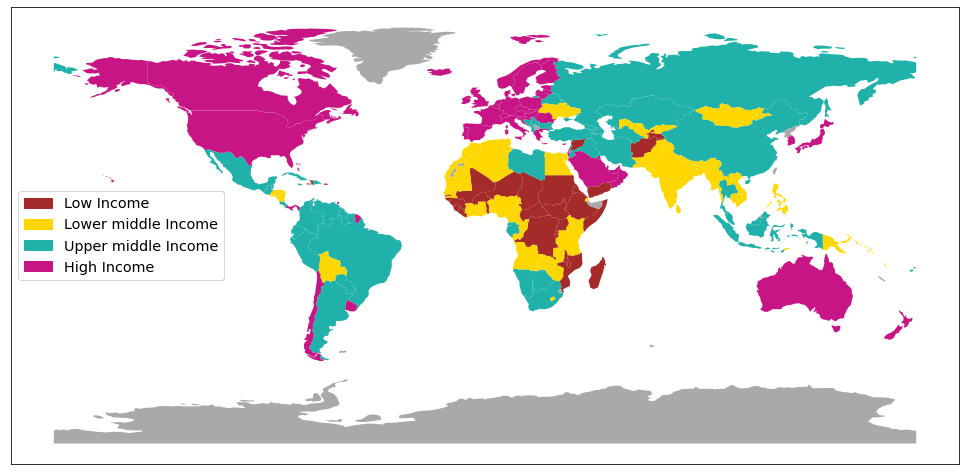

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
world_new5.plot(color=world_new5['col_income'],
                ax=ax, categorical=True
               )
li_patch = mpatches.Patch(color='brown', label='Low Income')
lmi_patch = mpatches.Patch(color='gold', label='Lower middle Income')
umi_patch = mpatches.Patch(color='lightseagreen', label='Upper middle Income')
hi_patch = mpatches.Patch(color='mediumvioletred', label='High Income')

plt.legend(handles=[li_patch, lmi_patch,umi_patch,hi_patch], loc='center left', fontsize='x-large')
#plt.title('Income-based groups',y=1.02,fontdict={'fontsize': 32})
plt.xticks([])
plt.yticks([])
plt.savefig('/Users/saravallejomengod/MathsYear4/M4R/utils/WM_Income_3.png', format='png',bbox_inches='tight')
   
plt.show()

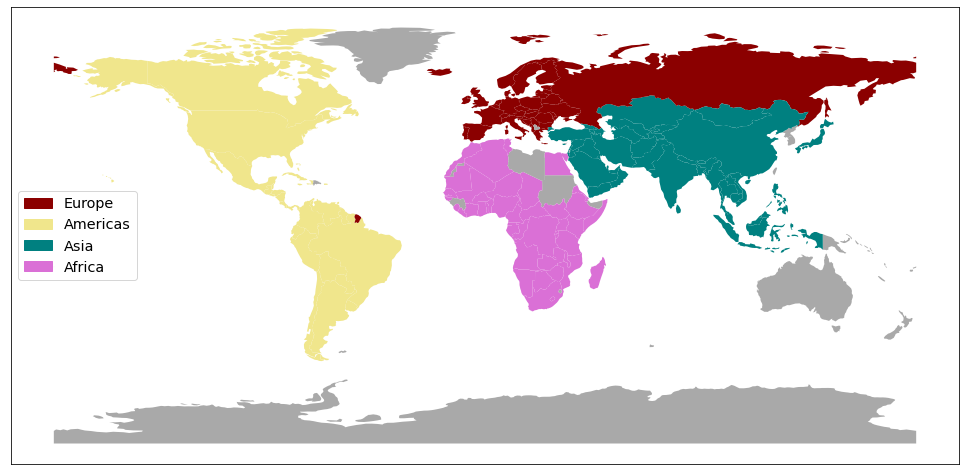

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
world_new5.plot(color=world_new5['col_geo'],
                ax=ax, categorical=True
               )
e_patch = mpatches.Patch(color='darkred', label='Europe')
am_patch = mpatches.Patch(color='khaki', label='Americas')
as_patch = mpatches.Patch(color='teal', label='Asia')
af_patch = mpatches.Patch(color='orchid', label='Africa')

plt.legend(handles=[e_patch, am_patch,as_patch,af_patch], loc='center left', fontsize='x-large')
#plt.title('Regional groups',y=1.02,fontdict={'fontsize': 32})
plt.xticks([])
plt.yticks([])
plt.savefig('/Users/saravallejomengod/MathsYear4/M4R/utils/WM_Geo_3.png', format='png',bbox_inches='tight')

plt.show()

In [173]:
for i in world['name'].unique():
    if i not in world_new['name'].unique():
        print(i)

Fiji
W. Sahara
Papua New Guinea
Sudan
Dominican Rep.
Falkland Is.
Greenland
Fr. S. Antarctic Lands
Guinea
eSwatini
Palestine
Vanuatu
North Korea
South Korea
New Caledonia
Solomon Is.
New Zealand
Australia
Taiwan
Antarctica
N. Cyprus
Libya
Somaliland
Macedonia
Kosovo
